In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
%matplotlib inline

In [146]:
data = pd.read_csv('matches.csv')
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [31]:
#Cleaning of Data as umpire 3 values are null and deleting any null values.


data.drop(data.columns[[17]],axis=1,inplace=True)
data.dropna(inplace=True)
data.shape

(625, 17)

In [71]:
#Characterising Data by each season
name_dict = {}
season_2008 = data[data["season"]==2008]
name_dict["season_2008"]=season_2008

season_2009 = data[data["season"]==2009]
name_dict["season_2009"]=season_2009

season_2010 = data[data["season"]==2010]
name_dict["season_2010"]=season_2010

season_2011 = data[data["season"]==2011]
name_dict["season_2011"]=season_2011

season_2012 = data[data["season"]==2012]
name_dict["season_2012"]=season_2012

season_2013 = data[data["season"]==2013]
name_dict["season_2013"]=season_2013

season_2014 = data[data["season"]==2014]
name_dict["season_2014"]=season_2014

season_2015 = data[data["season"]==2015]
name_dict["season_2015"]=season_2015

season_2016 = data[data["season"]==2016]
name_dict["season_2016"]=season_2016

season_2017 = data[data["season"]==2017]
name_dict["season_2017"]=season_2017



In [33]:
#No.of matches won by each team over 10 seasons
data.winner.value_counts()

Mumbai Indians                 92
Kolkata Knight Riders          77
Chennai Super Kings            77
Royal Challengers Bangalore    71
Kings XI Punjab                69
Rajasthan Royals               63
Delhi Daredevils               61
Sunrisers Hyderabad            40
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

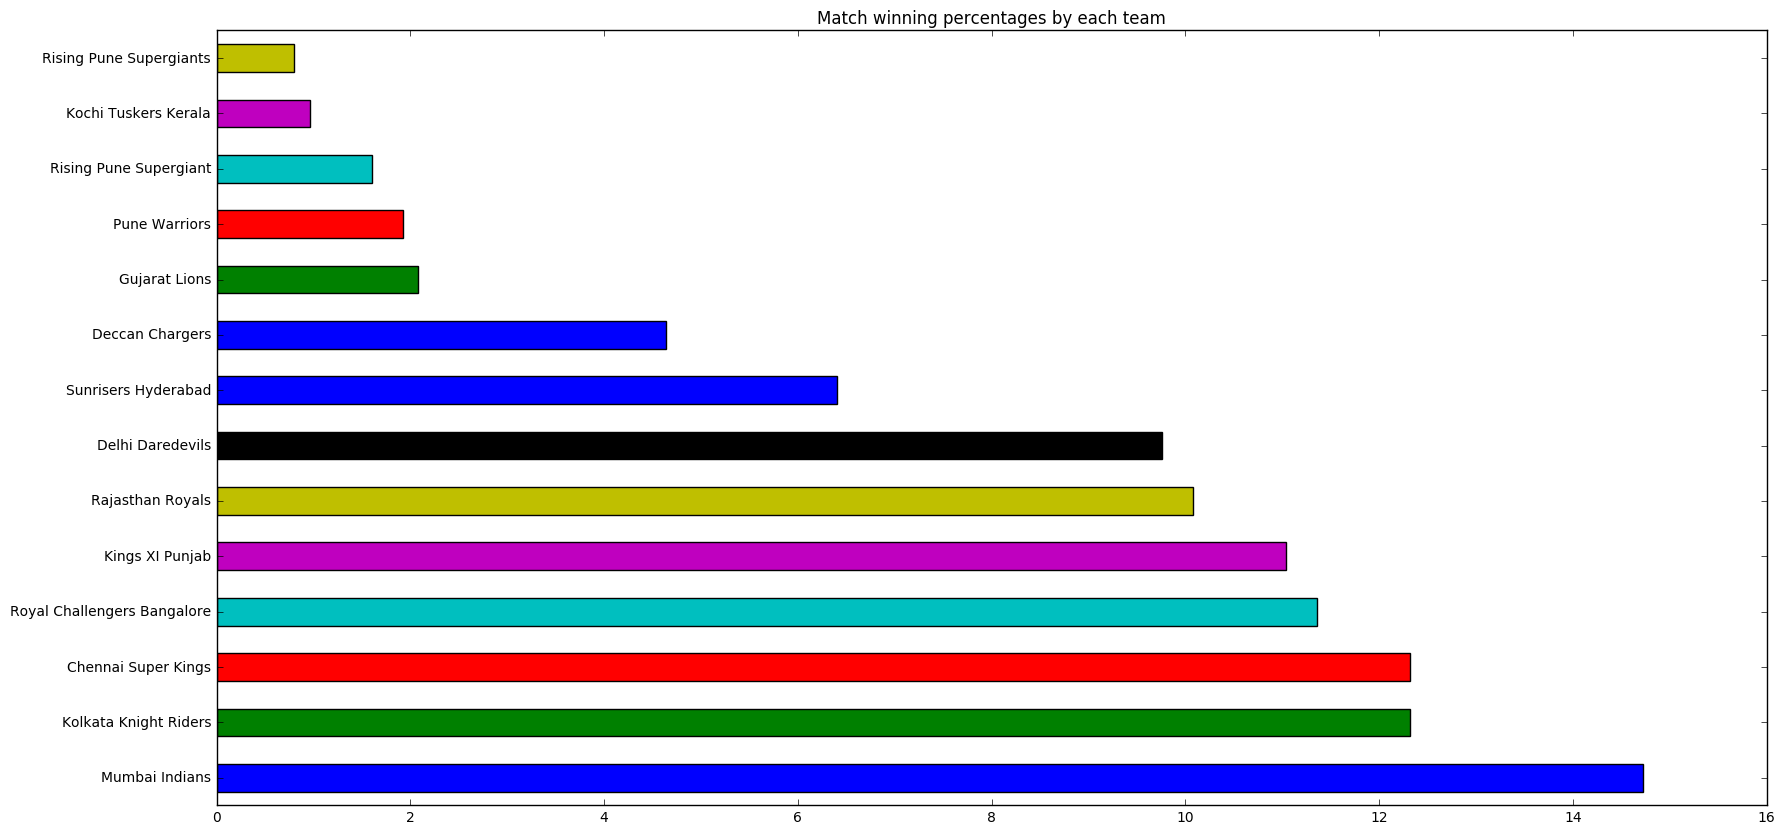

In [34]:
#Plotting this winner data
(data.winner.value_counts(normalize =True)*100).plot(kind = 'barh' , title='Match winning percentages by each team',figsize = (20,10))

In [35]:
# No. of matches won by team who wins the toss

toss_match_winner = data[data["toss_winner"]==data["winner"]]
toss_match_winner.winner.value_counts()

Mumbai Indians                 48
Kolkata Knight Riders          44
Chennai Super Kings            42
Rajasthan Royals               34
Delhi Daredevils               33
Royal Challengers Bangalore    33
Kings XI Punjab                27
Deccan Chargers                19
Sunrisers Hyderabad            16
Gujarat Lions                  10
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: winner, dtype: int64

<h1>Match and toss winning percentages of teams</h1>

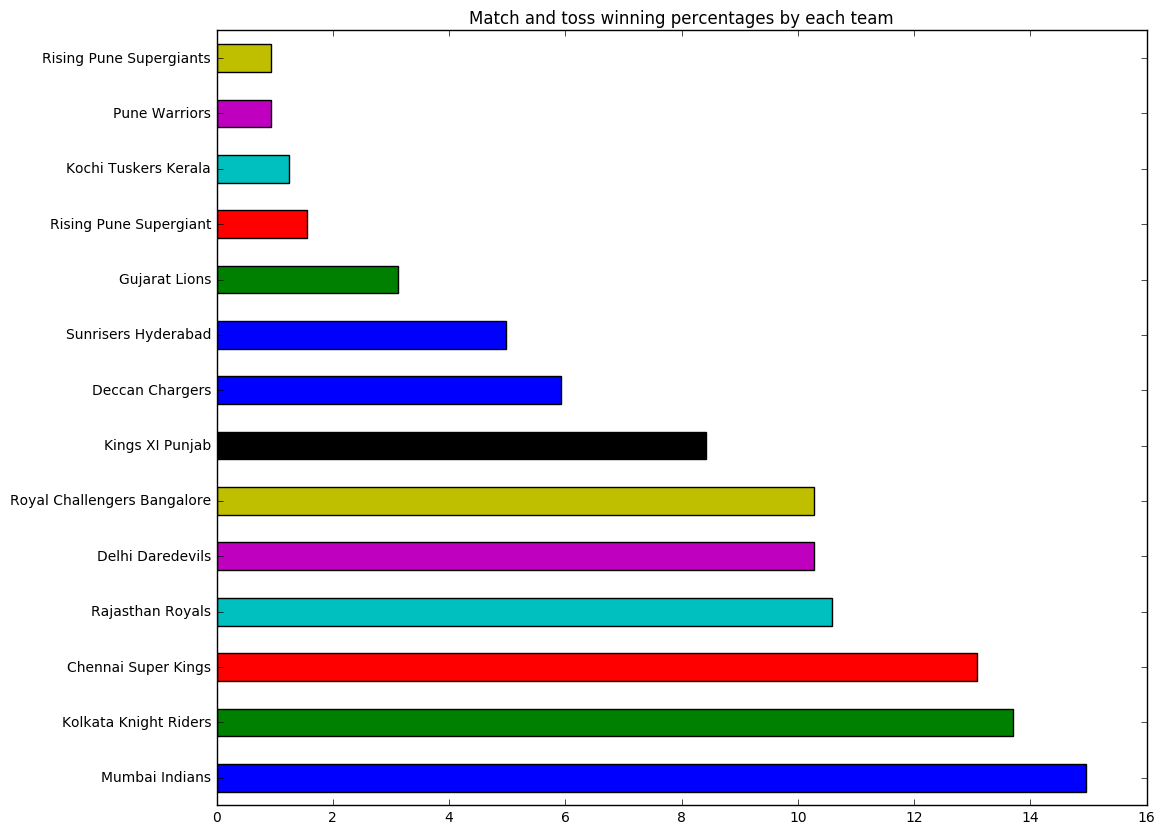

In [36]:
(toss_match_winner.winner.value_counts(normalize =True)*100).plot(kind = 'barh' , title='Match and toss winning percentages by each team',figsize = (12,10))

<h1>Toss decision of teams w.r.t to winning those matches</h1>

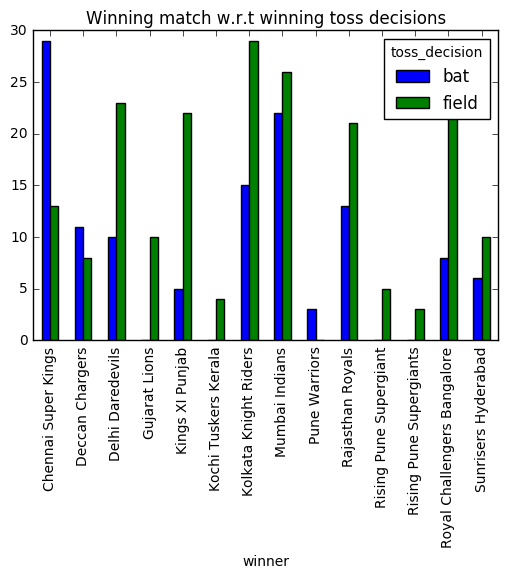

In [37]:
pd.crosstab(toss_match_winner.winner,toss_match_winner.toss_decision).plot(kind='bar',title='Winning match w.r.t winning toss decisions')

<h1>Season 2017 Venue winning comparisons</h1>

In [40]:
# No.of matches won in each city for season 2017

pd.crosstab(season_2017.winner,season_2017.city)

city,Bangalore,Chandigarh,Delhi,Hyderabad,Indore,Kanpur,Kolkata,Mumbai,Pune,Rajkot
winner,,,,,,,,,,
Delhi Daredevils,0,0,4,0,0,1,0,0,1,0
Gujarat Lions,1,1,0,0,0,0,1,0,0,1
Kings XI Punjab,1,2,0,0,2,0,0,1,0,1
Kolkata Knight Riders,2,0,1,0,0,0,4,0,1,1
Mumbai Indians,2,0,1,1,1,0,1,5,0,1
Rising Pune Supergiant,1,0,0,1,0,0,1,2,5,0
Royal Challengers Bangalore,0,0,1,0,0,0,0,0,0,1
Sunrisers Hyderabad,0,1,0,6,0,1,0,0,0,0


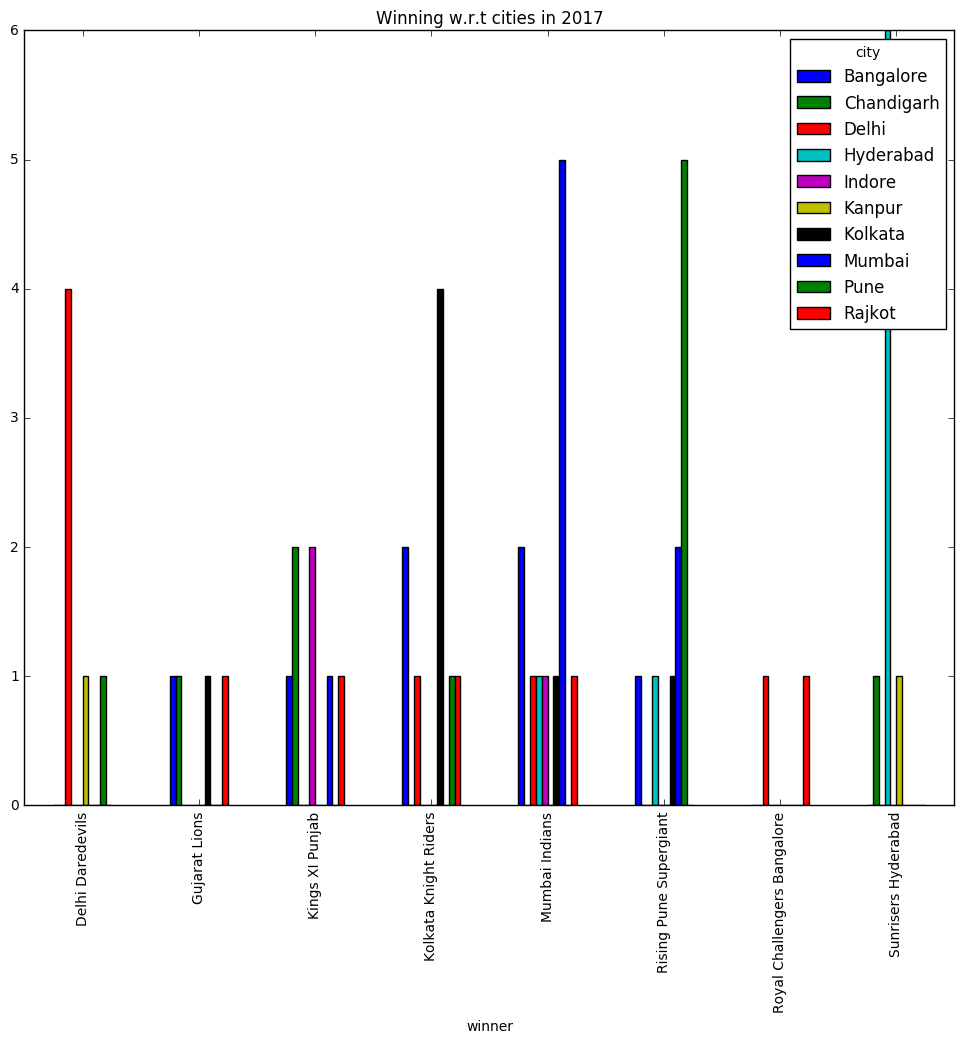

In [49]:
pd.crosstab(season_2017.winner,season_2017.city).plot(kind='bar',title='Winning w.r.t cities in 2017',figsize=(12,10))


<h1>Visualising Man of the Match over 10 Seasons</h1>
<ul>
    <li>Players winning no. of man of the matches in 10 seasons</li>
    <li>Player of the match per season</li>

In [57]:
data.player_of_match.value_counts()

CH Gayle             18
YK Pathan            16
AB de Villiers       15
DA Warner            15
SK Raina             14
RG Sharma            14
G Gambhir            13
MS Dhoni             13
AM Rahane            12
MEK Hussey           12
V Kohli              11
DR Smith             11
V Sehwag             11
JH Kallis            10
SR Watson            10
A Mishra              9
SE Marsh              9
KA Pollard            9
SR Tendulkar          8
RV Uthappa            7
AT Rayudu             7
AC Gilchrist          7
Harbhajan Singh       6
AD Russell            6
SP Narine             6
A Nehra               6
M Vijay               6
RA Jadeja             6
BJ Hodge              6
UT Yadav              6
                     ..
GD McGrath            1
A Singh               1
JD Ryder              1
PP Ojha               1
AP Tare               1
S Nadeem              1
RS Bopara             1
AA Jhunjhunwala       1
NV Ojha               1
MD Mishra             1
AC Voges        

<h1>Player of the match per season</h1>


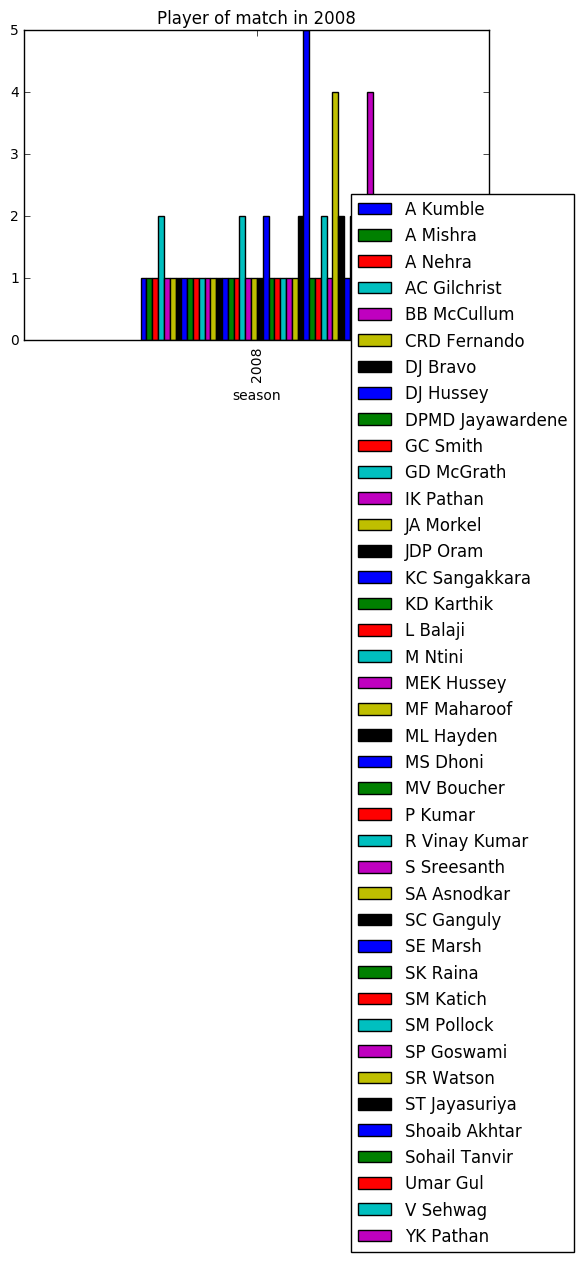

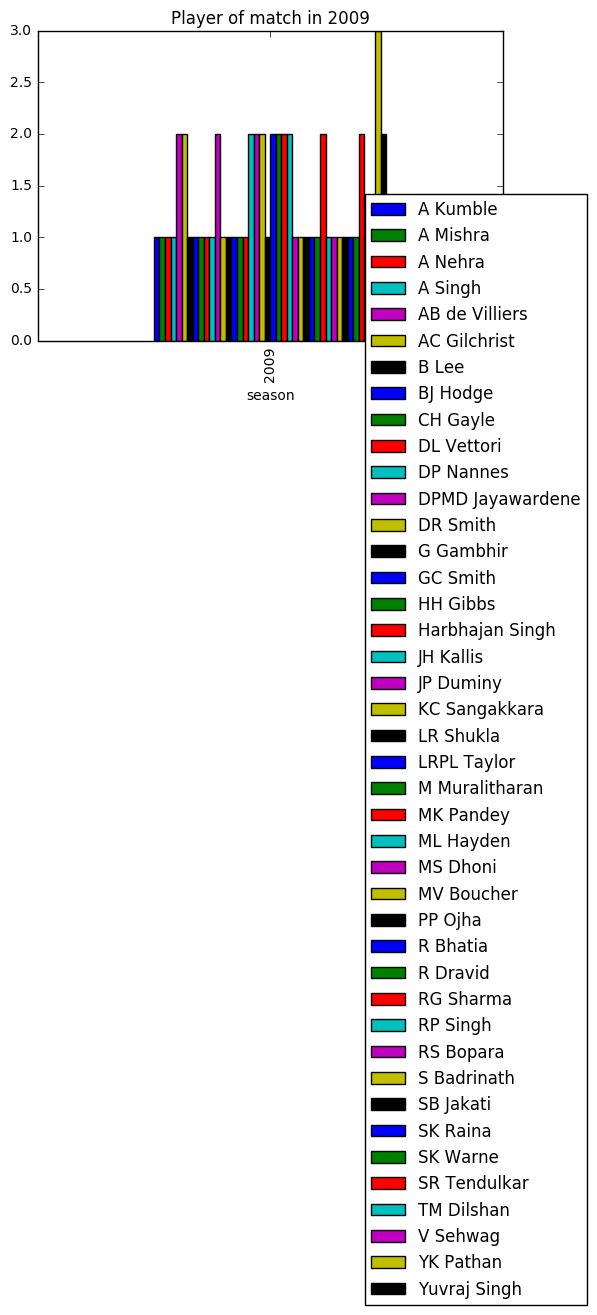

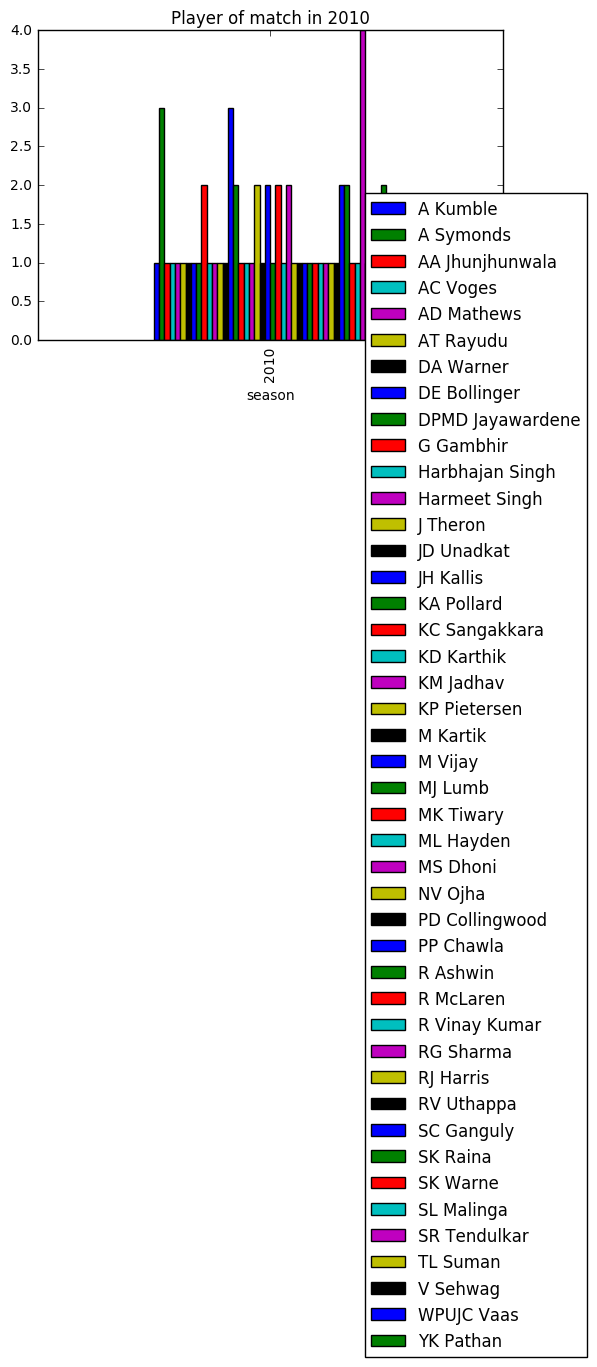

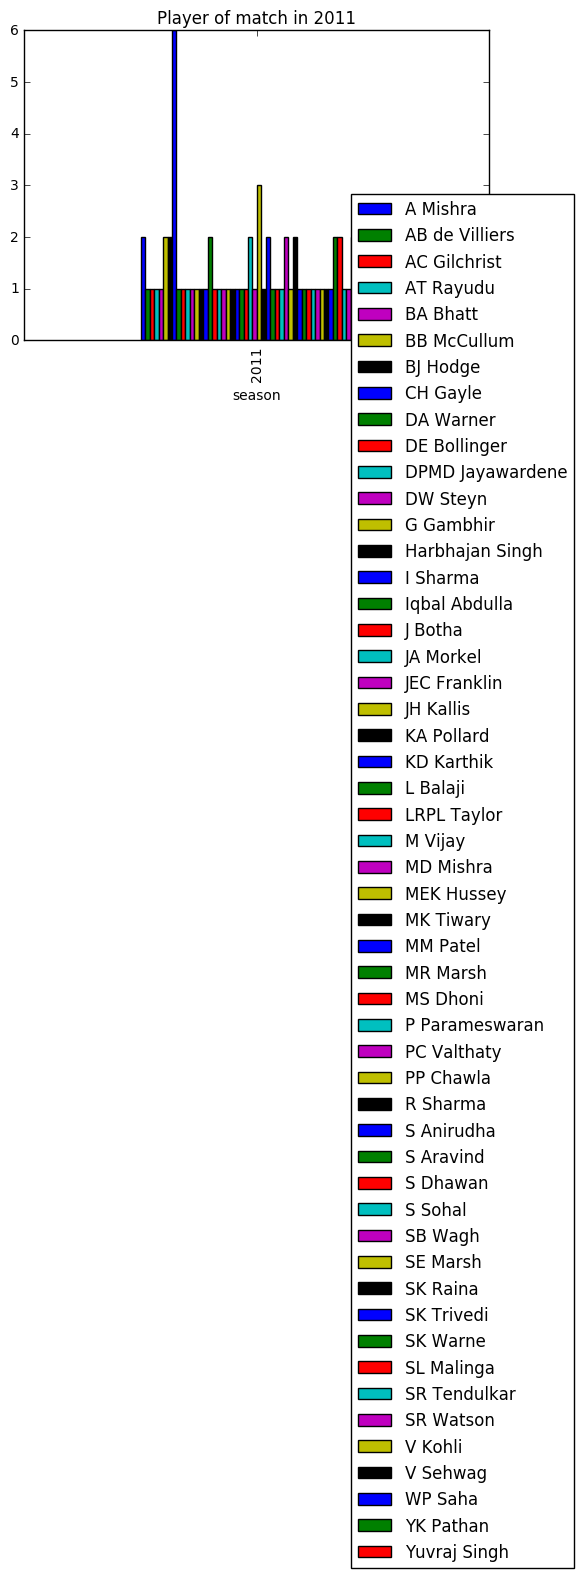

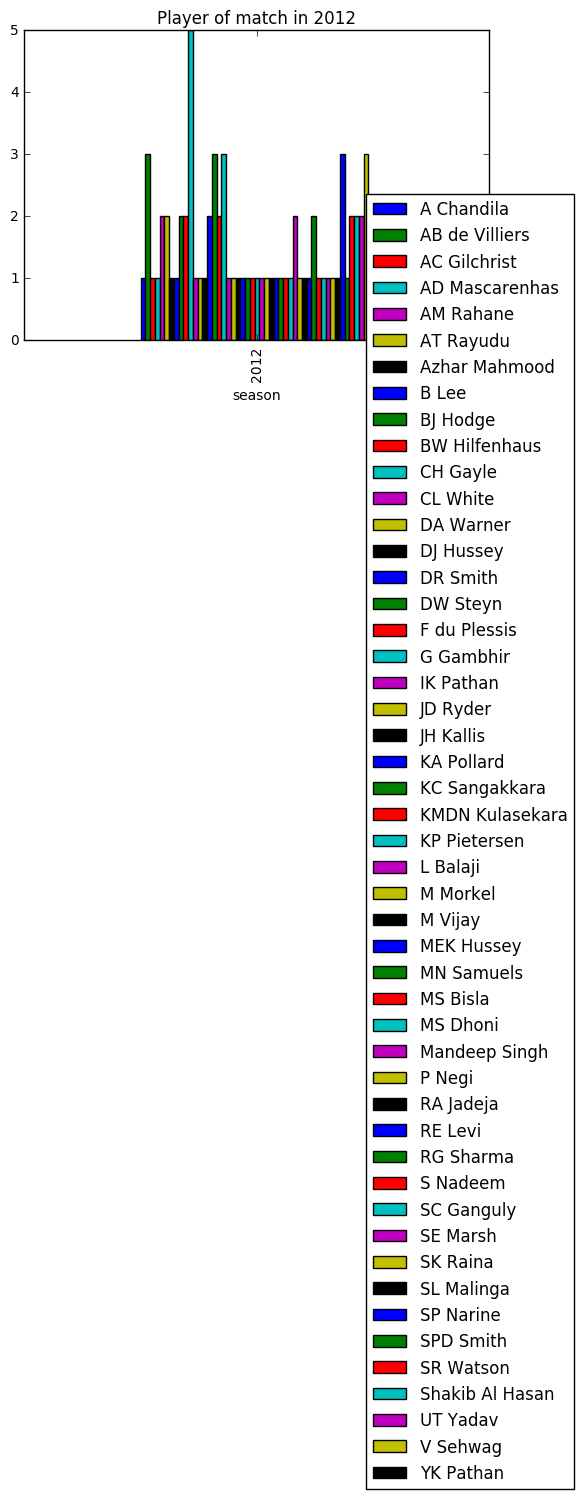

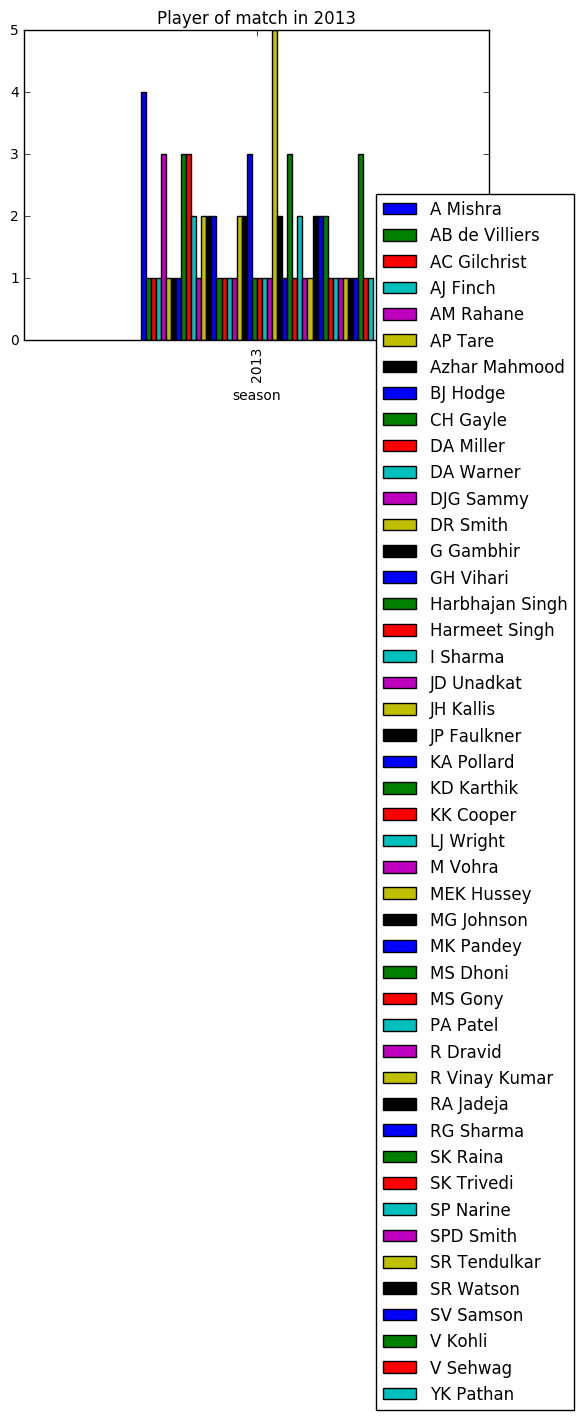

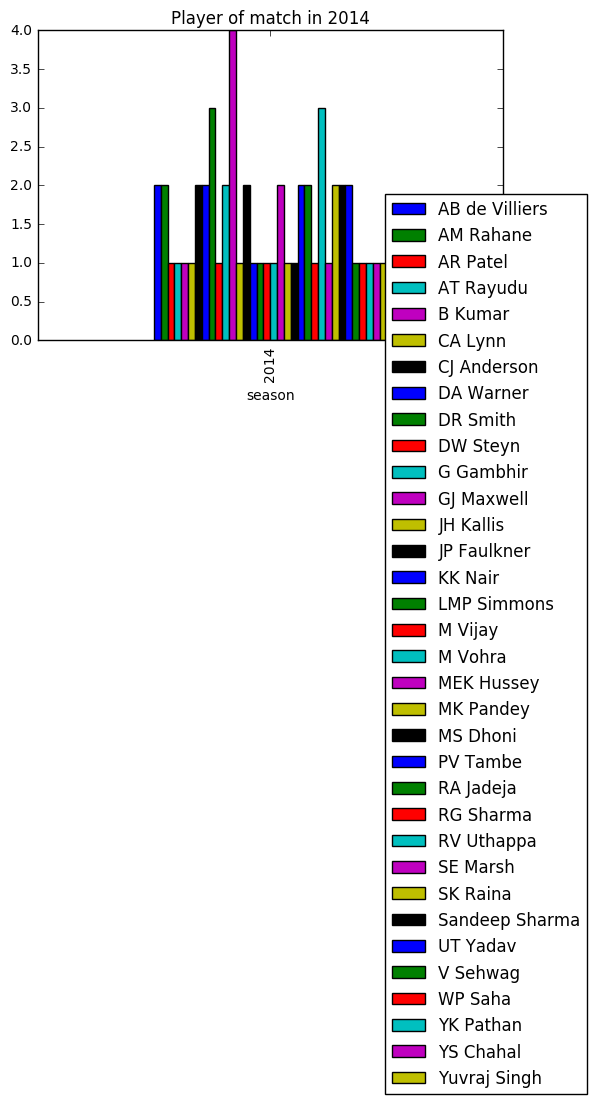

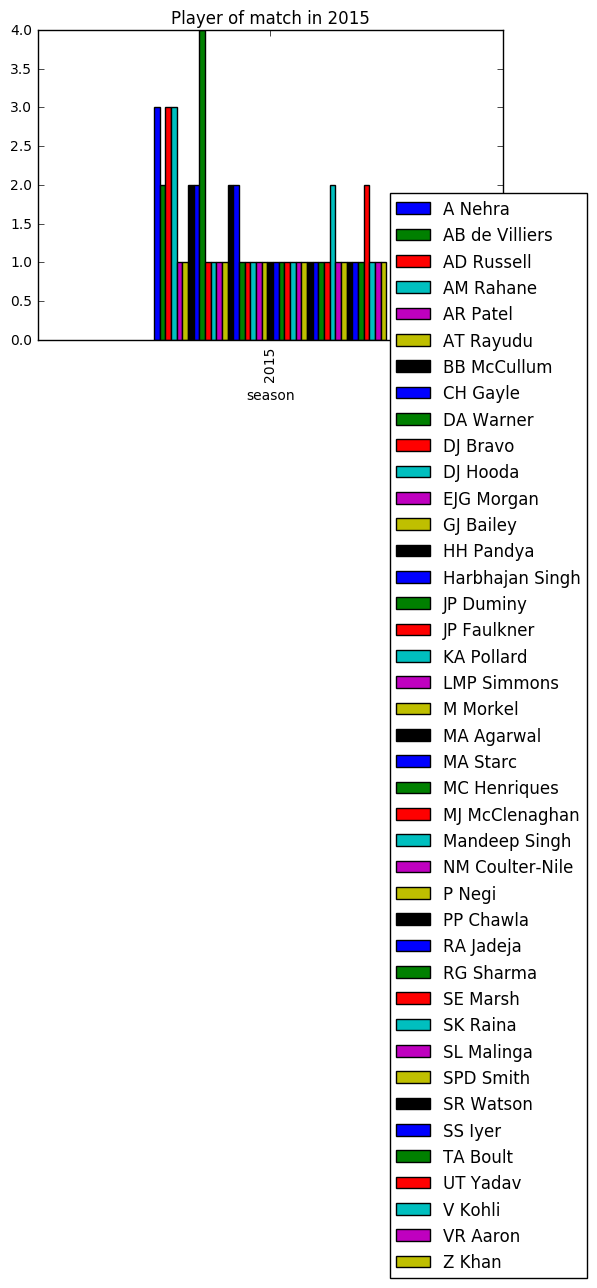

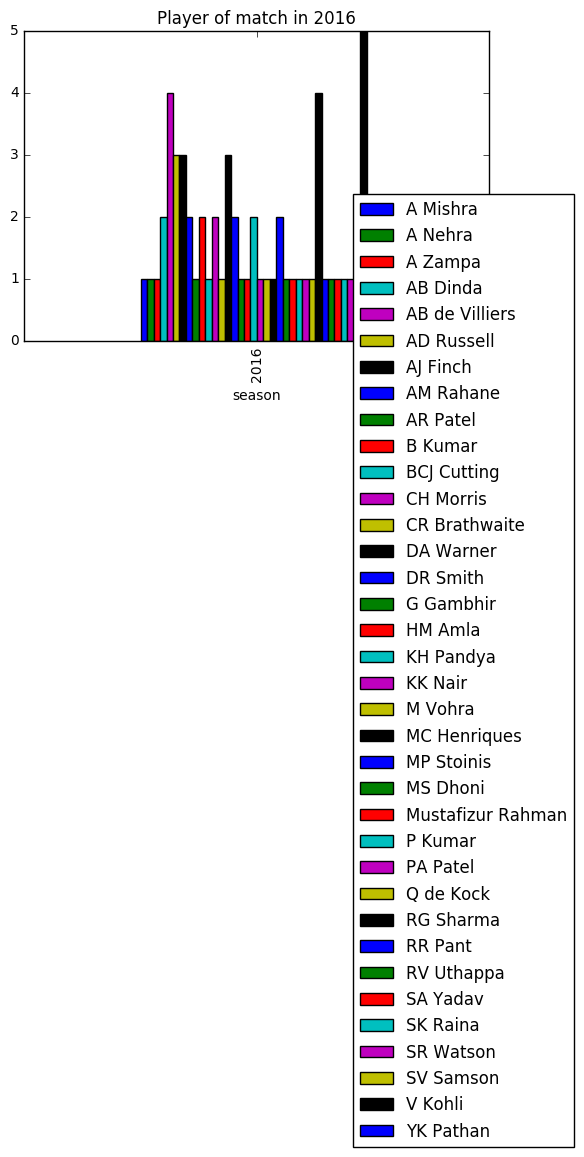

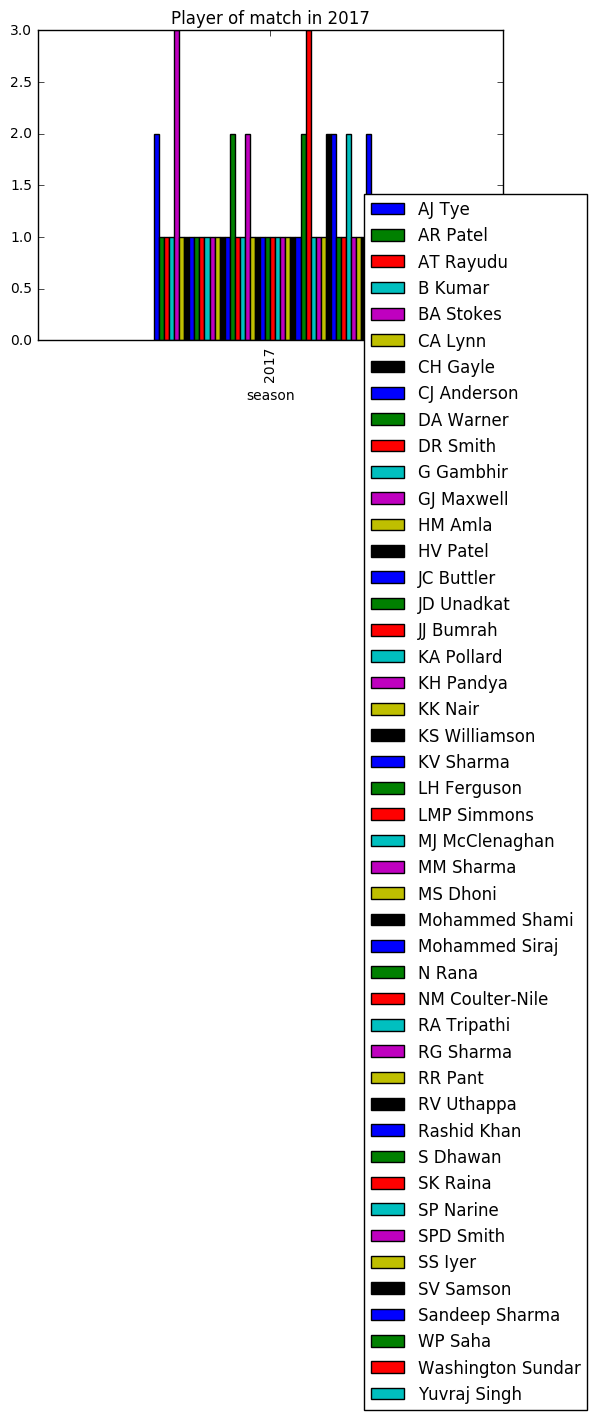

In [73]:
symbol = ["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]

for i in symbol:
    season = "season_" +i
    pd.crosstab(name_dict[season].season,name_dict[season].player_of_match).plot(kind='bar', title='Player of match in '+ i).legend(bbox_to_anchor=(1.2, 0.5))


<h1>Match Results over 10 seasons</h1>

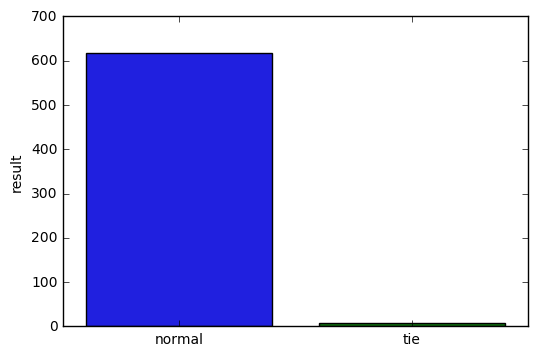

In [83]:
sns.barplot(data.result.value_counts().index,data.result.value_counts(),data=data)

<h2>Visualising no. of matches where DL was applied</h2>

In [86]:
# DL applied
data.dl_applied.value_counts()

0    609
1     16
Name: dl_applied, dtype: int64

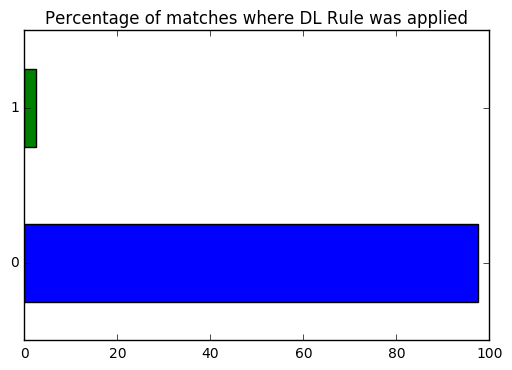

In [88]:
(data.dl_applied.value_counts(normalize =True)*100).plot(kind = 'barh' , title='Percentage of matches where DL Rule was applied',figsize = (6,4))

In [147]:
#Matches won by team batting second
df = data[data["win_by_wickets"]!=0]
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


<h1>Matches where team batting second won and there results w.r.t to DL system</h1> 

0    328
1      7
Name: dl_applied, dtype: int64


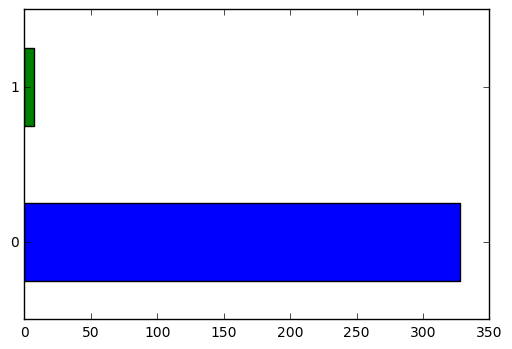

In [130]:
df.dl_applied.value_counts().plot(kind='barh')
print(df.dl_applied.value_counts())

<h1>Maximum Toss Winners</h1>

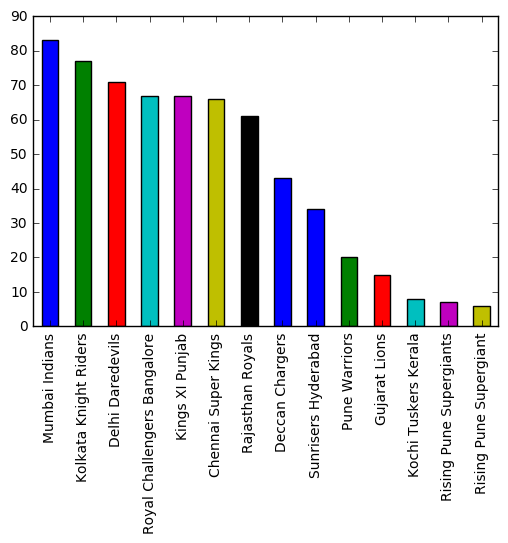

In [132]:
data.toss_winner.value_counts()
data.toss_winner.value_counts().plot(kind='bar')

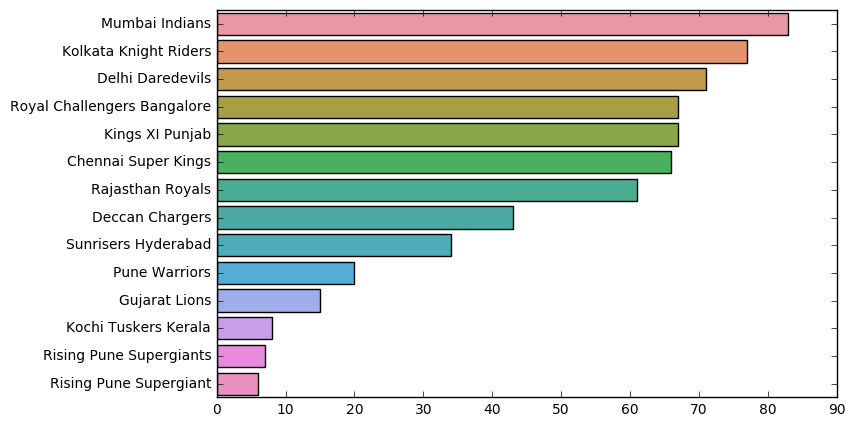

In [133]:
#By seaborn
plt.subplots(figsize=(8,5))
sns.barplot(x=data.toss_winner.value_counts().values,y=data.toss_winner.value_counts().index)

<h1>Winners of Each Season</h1>

In [144]:
symbol = ["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]

for i in symbol:
    season = "season_" +i
    print("Season:"+i+"\n")
    print("Winner:"+name_dict[season].winner.iloc[-1])
    print("Runner-up:"+(name_dict[season].team2.iloc[-1] if(name_dict[season].team1.iloc[-1]==name_dict[season].winner.iloc[-1]) else (name_dict[season].team1.iloc[-1])))
    print("\n")

Season:2008

Winner:Rajasthan Royals
Runner-up:Chennai Super Kings


Season:2009

Winner:Deccan Chargers
Runner-up:Royal Challengers Bangalore


Season:2010

Winner:Chennai Super Kings
Runner-up:Mumbai Indians


Season:2011

Winner:Chennai Super Kings
Runner-up:Royal Challengers Bangalore


Season:2012

Winner:Kolkata Knight Riders
Runner-up:Chennai Super Kings


Season:2013

Winner:Mumbai Indians
Runner-up:Chennai Super Kings


Season:2014

Winner:Kolkata Knight Riders
Runner-up:Kings XI Punjab


Season:2015

Winner:Mumbai Indians
Runner-up:Chennai Super Kings


Season:2016

Winner:Sunrisers Hyderabad
Runner-up:Royal Challengers Bangalore


Season:2017

Winner:Mumbai Indians
Runner-up:Rising Pune Supergiant


